# Homework03: Input Modeling  

# ÖZGE SAYAR

In [7]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

**Question 1:** Implement a q-q plot for exponential distribution.

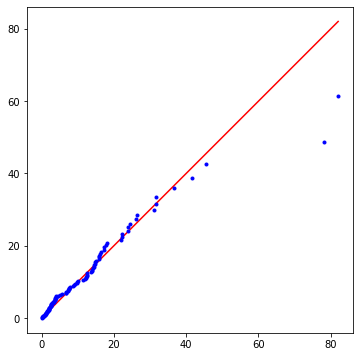

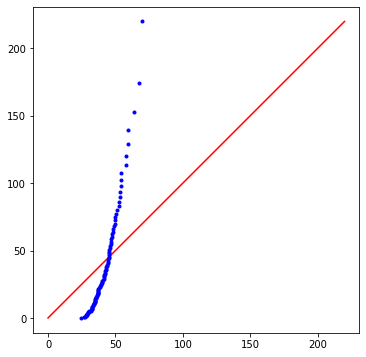

In [15]:
#Q-Q Plot for Exponential Distribution
def exponential_qq_plot(X):
    #### please write below this line
    
    N = len(X)
    j = np.arange(1, N + 1, 1)
    Value = np.sort(X)
    Z = (j - 0.5) / N
    Finv = stats.expon.ppf(Z, scale= np.mean(X))
    
    plt.figure(figsize=(8, 6))
    plt.plot([0,max(np.max(Value),np.max(Finv))],
         [0,max(np.max(Value),np.max(Finv))], "r-")
    plt.plot(Value, Finv, "b.")
    plt.gca().set_aspect("equal")
    plt.show()
    
    #### please write above this line
    
np.random.seed(344)
X = np.random.exponential(scale = 10, size = 100)
exponential_qq_plot(X)

np.random.seed(344)
X = np.random.normal(loc = 40, scale = 10, size = 100)
exponential_qq_plot(X)

**Question 2:** Implement a chi-square test for normal distribution.

In [9]:
#Chi-Square Test for Normal Distribution
def normality_test_using_chi_square(X, interval_count, alpha):
    #### please write above this line
    
    sample_mean = np.mean(X)
    sample_deviation = np.std(X, ddof = 1)
    N = len(X)

    left_border = np.zeros(interval_count)
    right_border = np.zeros(interval_count)
    O = np.zeros(interval_count)
    E = np.ones(interval_count) * N / interval_count
    
    for i in range(interval_count):
        left_border[i] = stats.norm.ppf(i/ interval_count, loc = sample_mean, scale = sample_deviation)
        right_border[i] = stats.norm.ppf((i + 1) / interval_count, loc = sample_mean, scale = sample_deviation)
        O[i] = np.sum((left_border[i] <= X) & (X < right_border[i]))
    chi_square = np.sum((O - E)**2 / E)
    critical_value = stats.chi2.ppf(1-alpha, df = interval_count - 2 - 1)
    
    #### please write below this line
    return(chi_square, critical_value)

np.random.seed(344)
X = np.random.normal(loc = 240, scale = 10, size = 100)
interval_count = 10
alpha = 0.05
chi_square, critical_value = normality_test_using_chi_square(X, interval_count, alpha)
print("Test statistic is {}".format(chi_square))
print("Critical value is {}".format(critical_value))
if chi_square <= critical_value:
    print("Fail to reject H0.")
else:
    print("Reject H0.")
    
np.random.seed(344)
X = np.random.uniform(low = 210, high = 270, size = 100)
interval_count = 10
alpha = 0.05
chi_square, critical_value = normality_test_using_chi_square(X, interval_count, alpha)
print("Test statistic is {}".format(chi_square))
print("Critical value is {}".format(critical_value))
if chi_square <= critical_value:
    print("Fail to reject H0.")
else:
    print("Reject H0.")

Test statistic is 5.4
Critical value is 14.067140449340169
Fail to reject H0.
Test statistic is 27.6
Critical value is 14.067140449340169
Reject H0.
